# Unit 5 - Financial Planning

In [26]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [27]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [28]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [29]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

import json

response_data_btc = requests.get(btc_url).json()
response_data_btc

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 19428768,
   'total_supply': 19428768,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 31434.0,
     'volume_24h': 23497608987,
     'market_cap': 610626673460,
     'percentage_change_1h': -0.108964482804977,
     'percentage_change_24h': 3.71457162858403,
     'percentage_change_7d': 4.3478238444764,
     'percent_change_1h': -0.108964482804977,
     'percent_change_24h': 3.71457162858403,
     'percent_change_7d': 4.3478238444764}},
   'last_updated': 1689310491}},
 'metadata': {'timestamp': 1689310491,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [30]:
response_data_eth = requests.get(eth_url).json()
response_data_eth

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 120203171,
   'total_supply': 120203171,
   'max_supply': 120203171,
   'quotes': {'USD': {'price': 2011.57,
     'volume_24h': 12696130049,
     'market_cap': 241529570566,
     'percentage_change_1h': 0.103256125662643,
     'percentage_change_24h': 7.7575265486434,
     'percentage_change_7d': 8.31622642402234,
     'percent_change_1h': 0.103256125662643,
     'percent_change_24h': 7.7575265486434,
     'percent_change_7d': 8.31622642402234}},
   'last_updated': 1689310496}},
 'metadata': {'timestamp': 1689310496,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [31]:
print(json.dumps(response_data_btc, indent=2))

{
  "data": {
    "1": {
      "id": 1,
      "name": "Bitcoin",
      "symbol": "BTC",
      "website_slug": "bitcoin",
      "rank": 1,
      "circulating_supply": 19428768,
      "total_supply": 19428768,
      "max_supply": 21000000,
      "quotes": {
        "USD": {
          "price": 31434.0,
          "volume_24h": 23497608987,
          "market_cap": 610626673460,
          "percentage_change_1h": -0.108964482804977,
          "percentage_change_24h": 3.71457162858403,
          "percentage_change_7d": 4.3478238444764,
          "percent_change_1h": -0.108964482804977,
          "percent_change_24h": 3.71457162858403,
          "percent_change_7d": 4.3478238444764
        }
      },
      "last_updated": 1689310491
    }
  },
  "metadata": {
    "timestamp": 1689310491,
    "num_cryptocurrencies": 3119,
    "error": null
  }
}


In [32]:
print(json.dumps(response_data_eth, indent=2))

{
  "data": {
    "1027": {
      "id": 1027,
      "name": "Ethereum",
      "symbol": "ETH",
      "website_slug": "ethereum",
      "rank": 2,
      "circulating_supply": 120203171,
      "total_supply": 120203171,
      "max_supply": 120203171,
      "quotes": {
        "USD": {
          "price": 2011.57,
          "volume_24h": 12696130049,
          "market_cap": 241529570566,
          "percentage_change_1h": 0.103256125662643,
          "percentage_change_24h": 7.7575265486434,
          "percentage_change_7d": 8.31622642402234,
          "percent_change_1h": 0.103256125662643,
          "percent_change_24h": 7.7575265486434,
          "percent_change_7d": 8.31622642402234
        }
      },
      "last_updated": 1689310496
    }
  },
  "metadata": {
    "timestamp": 1689310496,
    "num_cryptocurrencies": 3119,
    "error": null
  }
}


In [33]:
# Fetch current BTC price
BTC_price = response_data_btc['data']['1']['quotes']['USD']['price']
BTC_price

31434.0

In [34]:
# Fetch current ETH price
ETH_price = response_data_eth['data']['1027']['quotes']['USD']['price']
ETH_price

2011.57

In [35]:
# Compute current value of my crpto
my_btc_value = BTC_price * my_btc
my_eth_value = ETH_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $37720.80
The current value of your 5.3 ETH is $10661.32


In [36]:
crypto_value = my_btc_value + my_eth_value
crypto_value

48382.121

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [37]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [38]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [39]:
# Format current date as ISO format
today = pd.Timestamp("2023-07-12", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Display sample data
df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2023-07-12 04:00:00+00:00,97.51,97.8499,97.45,97.80,7188297,23477,97.718218,AGG
2023-07-12 04:00:00+00:00,446.39,447.4799,444.91,446.02,91494187,582590,445.659196,SPY


In [40]:
# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])


# Preview DataFrame
df_portfolio.head(5)

AGG                                             \
                            open     high    low close   volume trade_count   
timestamp                                                                     
2023-07-12 04:00:00+00:00  97.51  97.8499  97.45  97.8  7188297       23477   

                                         SPY                            \
                                vwap    open      high     low   close   
timestamp                                                                
2023-07-12 04:00:00+00:00  97.718218  446.39  447.4799  444.91  446.02   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2023-07-12 04:00:00+00:00  91494187      582590  445.659196

In [41]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio['AGG']['close'])
spy_close_price = float(df_portfolio['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $97.8
Current SPY closing price: $446.02


In [42]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22301.00
The current value of your 200 AGG shares is $19560.00


In [43]:
shares_value = my_spy_value + my_agg_value
shares_value

41861.0

### Savings Health Analysis

In [44]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame

value_data = {
    "crypto": [crypto_value],
    "shares": [shares_value]
}

df_value_data = pd.DataFrame(value_data)
df_savings = pd.DataFrame({'amount':[df_value_data.at[0,'crypto'],df_value_data.at[0,'shares']]},index=['crypto','shares'])              

df_savings

,amount
crypto,48382.121
shares,41861.000


<Axes: title={'center': 'Composition of Personal Savings'}, ylabel='amount'>

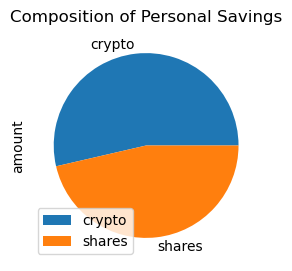

In [52]:
df_savings.plot.pie(y="amount",figsize=(3,3),title="Composition of Personal Savings")

In [53]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_value + shares_value

# Validate saving health
if total_savings < emergency_fund:
    difference = emergency_fund - total_savings
    print(f"You are {difference} dollars away from reaching your emergency fund goal.")
else:
    print("Congratulations! You have reached your emergency fund goal!")

Congratulations! You have reached your emergency fund goal!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [54]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [55]:
# Get 5 years' worth of historical data for SPY and AGG

ticker = ["AGG", "SPY"]

df_stock_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

df_stock_data.head(3)

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-05-02 04:00:00+00:00,110.74,110.7400,110.5200,110.605,3553939,15119,110.627199,AGG
2016-05-03 04:00:00+00:00,110.89,110.9450,110.7500,110.810,3044940,15662,110.865995,AGG
2016-05-04 04:00:00+00:00,110.91,110.9315,110.7595,110.860,2920608,13982,110.879063,AGG


In [56]:
# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

In [57]:
#### Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [58]:
# Printing the simulation input data
MC_thirty_years.portfolio_data.head(5)

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [59]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.013493,1.002083,1.004131,0.986958,0.990476,1.003551,1.004509,0.993321,1.007904,1.006414,...,1.000063,0.995580,0.992510,0.998304,0.993684,0.998001,0.994482,0.994741,1.001231,1.002528
2,1.021777,1.014396,1.015631,0.990442,1.009787,1.012382,1.005838,0.991762,1.014645,1.010667,...,1.009253,0.998402,0.988066,1.004442,0.984316,0.983654,0.997003,1.000710,1.000330,1.002786
3,1.015085,1.009382,1.011035,0.991834,1.010402,1.016198,1.005627,0.979503,1.018907,1.005237,...,1.008575,1.006569,0.997666,1.003956,0.987982,0.991074,1.002602,1.003108,0.996941,1.015478
4,1.014604,0.999070,1.010031,0.993976,1.012035,1.011566,1.013219,0.979960,1.028404,1.002442,...,1.018537,1.006249,0.991983,0.997053,0.989590,1.006835,0.996053,1.003192,0.990428,1.025010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,16.693548,20.925679,12.703503,23.367776,59.387584,26.214439,11.500127,7.599103,14.256949,13.674099,...,17.670088,4.873306,8.661567,8.727236,15.111267,19.064218,13.812662,14.541949,20.761262,20.349910
7557,16.505260,20.724537,12.706597,23.358398,59.874602,26.434841,11.445292,7.591405,14.173348,13.667842,...,17.920163,4.832553,8.577665,8.775786,15.135461,19.081482,13.701951,14.310646,20.765866,20.074501
7558,16.467912,20.554327,12.785794,23.208674,60.080644,25.866985,11.411812,7.516973,14.095329,13.603438,...,17.890478,4.834882,8.570330,8.795499,15.188091,19.170439,13.670074,14.124569,20.796488,19.656218
7559,16.580369,20.521385,12.904307,23.376313,59.759698,25.677798,11.384506,7.559382,14.094788,13.631420,...,17.903271,4.836268,8.512770,8.844071,15.349978,19.237515,13.675680,14.135206,20.780498,19.692753


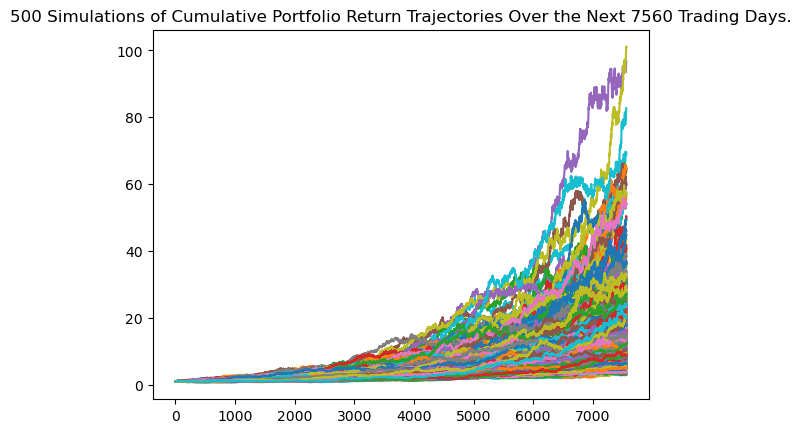

In [60]:
# Plot simulation outcomes
line_plot = MC_thirty_years.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_thirty_years_sim_plot.png", bbox_inches="tight")

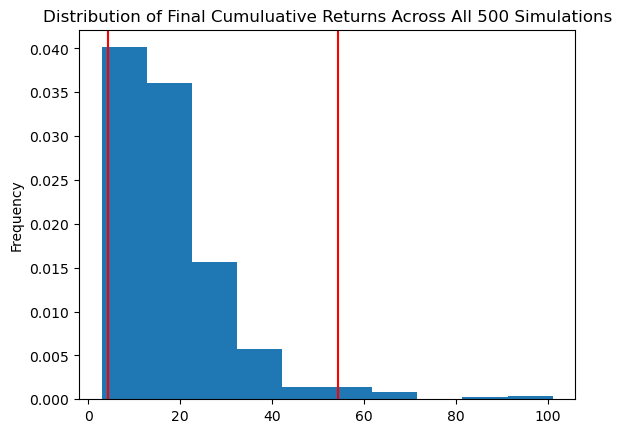

In [61]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_years.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_thirty_years_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [62]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_years.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             18.066614
std              12.567497
min               2.889679
25%               9.838112
50%              14.778201
75%              22.697418
max             101.053436
95% CI Lower      4.320755
95% CI Upper     54.301684
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [63]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $86415.1 and $1086033.69


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [64]:
# Set initial investment
initial_investment = 20000 * 1.5


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $129622.65 and $1629050.53


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [65]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [66]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.016263,1.006964,0.997201,1.008780,1.008187,1.009420,1.000309,1.003697,1.004059,1.002638,...,1.002597,0.991836,0.994288,1.000126,1.001409,1.013764,0.997368,1.008698,1.010430,0.990013
2,1.021251,1.002949,0.999788,1.017548,0.999405,1.000425,1.002497,1.011502,1.017734,1.004929,...,1.001738,0.985564,0.989562,0.983089,1.008605,1.002536,0.981907,1.010247,1.007582,0.987232
3,1.021489,1.000176,0.992114,1.029553,0.996163,1.001203,0.999333,1.015163,1.015422,1.000702,...,1.004262,0.988087,0.988858,0.987013,1.016354,1.003532,0.990092,1.013117,1.002894,0.993986
4,1.016832,1.006400,0.980155,1.033525,0.999969,0.993179,1.007566,1.022339,1.017621,0.993084,...,1.006646,0.982868,0.975729,0.980909,1.000334,1.000319,0.998038,1.010045,1.002527,0.983388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.645973,1.538503,2.340625,1.001527,1.447682,1.247704,1.950260,1.653373,1.901640,1.424483,...,1.760189,1.185374,2.132881,1.024014,1.566520,1.309328,1.864728,2.341123,1.369774,1.628671
1257,1.653283,1.543216,2.321641,1.009544,1.446482,1.247917,1.947297,1.653790,1.901652,1.425293,...,1.787515,1.179590,2.151167,1.019468,1.580367,1.300059,1.859466,2.329084,1.381549,1.632737
1258,1.655795,1.551285,2.298807,1.019356,1.445839,1.237462,1.938861,1.653736,1.900703,1.408207,...,1.782829,1.164715,2.175535,1.024896,1.578934,1.299071,1.863726,2.329335,1.386566,1.624398
1259,1.646745,1.553294,2.291398,1.018869,1.455688,1.246903,1.935224,1.653512,1.907223,1.413445,...,1.777436,1.168594,2.189765,1.026944,1.568771,1.295855,1.857524,2.335290,1.381450,1.612484


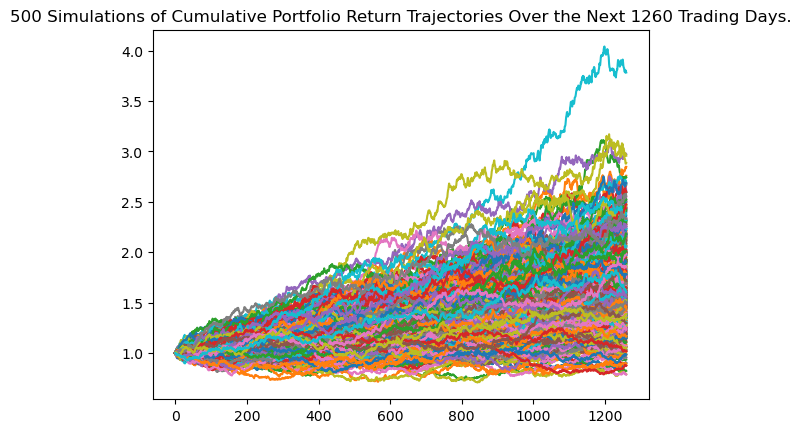

In [67]:
# Plot simulation outcomes
line_plot_five = MC_five_years.plot_simulation()

# Save the plot for future usage
line_plot_five.get_figure().savefig("MC_five_years_sim_plot.png", bbox_inches="tight")

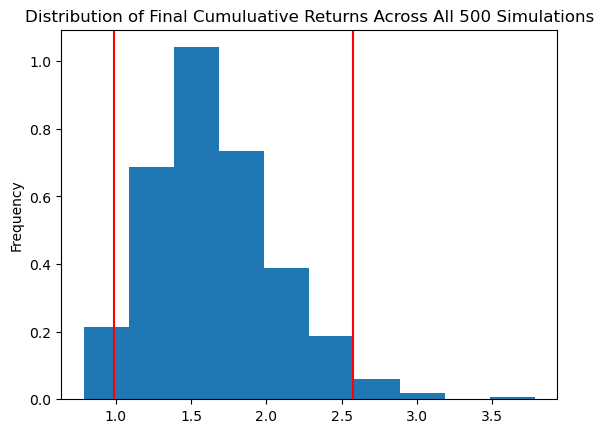

In [68]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_five_years.plot_distribution()

# Save the plot for future usage
dist_plot_five.get_figure().savefig('MC_five_years_dist_plot.png',bbox_inches='tight')

In [69]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_five_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.659762
std               0.417881
min               0.787527
25%               1.367270
50%               1.611338
75%               1.904298
max               3.783794
95% CI Lower      0.986633
95% CI Upper      2.577871
Name: 1260, dtype: float64


In [70]:
# Set initial investment
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*60000,2)
ci_upper_five = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $259245.3 and $3258101.07


### Ten Years Retirement Option

In [71]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [72]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004068,1.013347,1.008416,1.005134,1.003792,0.997117,1.008305,0.996856,1.002438,1.003948,...,1.007075,1.001317,1.009459,1.006772,1.006071,1.001055,1.004352,1.008576,1.000527,0.985617
2,1.003289,1.010685,1.017346,0.997741,0.994960,0.997777,1.001074,0.996164,1.011365,1.005635,...,1.002432,0.991690,1.008625,1.013270,1.010542,1.002248,0.997525,1.011104,1.000381,0.985610
3,1.001983,1.013301,1.019656,1.004019,1.000713,1.001120,1.014854,0.988970,1.010736,1.010185,...,1.007203,0.983803,1.007406,1.013529,1.008377,0.992771,0.996749,1.012711,0.998696,0.992121
4,0.998854,1.013502,1.010188,1.002663,1.009231,1.012509,1.013587,0.984345,0.996557,1.002073,...,0.991431,0.984669,0.994983,1.024261,1.019428,0.994206,1.004429,1.017220,1.000720,0.983532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.530498,3.614547,3.821615,0.943747,1.890676,2.588479,2.188355,2.234440,1.997255,3.801560,...,2.285420,3.965179,4.295338,3.019046,4.973403,2.035339,3.590380,2.934827,2.045815,2.144160
2517,1.530369,3.602214,3.806236,0.952102,1.906685,2.559834,2.166133,2.249397,2.000635,3.838001,...,2.274699,3.973727,4.246164,3.018705,4.999584,2.038256,3.569925,2.930186,2.064164,2.168754
2518,1.532556,3.614417,3.824263,0.944643,1.900065,2.557682,2.182377,2.259101,2.029702,3.855794,...,2.271074,3.963549,4.238746,3.078529,5.034038,2.059614,3.548635,2.950379,2.065633,2.181285
2519,1.543179,3.652358,3.857384,0.944308,1.915534,2.548130,2.189391,2.248198,2.026480,3.857616,...,2.251546,3.956708,4.259818,3.082557,4.989266,2.051889,3.576449,2.938000,2.077604,2.191044


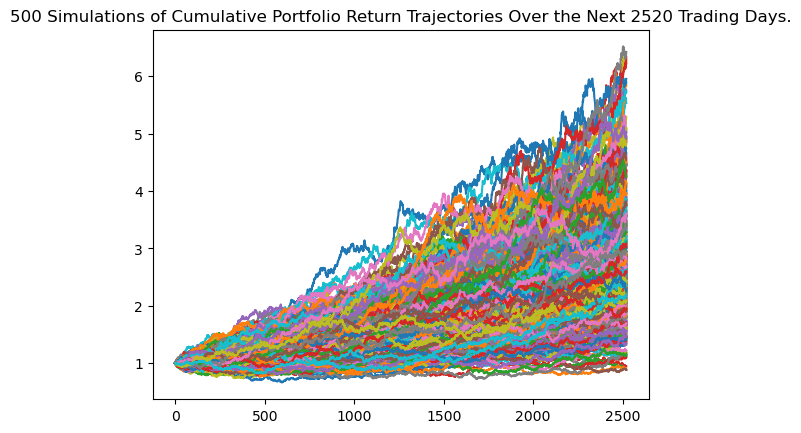

In [73]:
# Plot simulation outcomes
line_plot_ten = MC_ten_years.plot_simulation()

# Save the plot for future usage
line_plot_ten.get_figure().savefig("MC_ten_years_sim_plot.png", bbox_inches="tight")

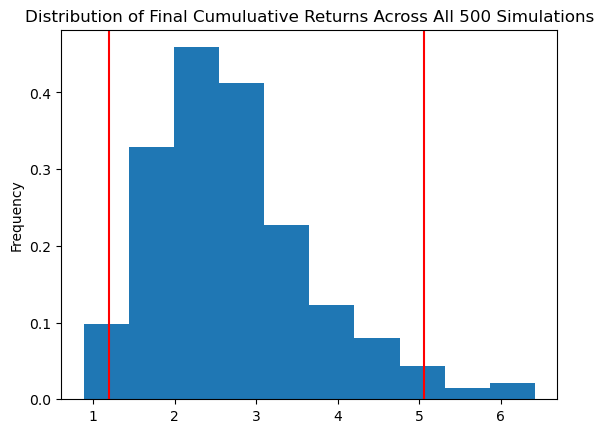

In [74]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_ten_years.plot_distribution()

# Save the plot for future usage
dist_plot_ten.get_figure().savefig('MC_ten_years_dist_plot.png',bbox_inches='tight')

In [75]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_ten_years.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              2.725281
std               0.991897
min               0.885182
25%               2.025172
50%               2.583415
75%               3.217184
max               6.421211
95% CI Lower      1.189238
95% CI Upper      5.054474
Name: 2520, dtype: float64


In [76]:
# Set initial investment
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*60000,2)
ci_upper_ten = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $259245.3 and $3258101.07
